In [20]:
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_energy, naive_ensemble
from models.energy.energy_models import energy_baseline,energy_LSTM, energy_XGBoost, energy_quantile_regression

## Hyperparameter tuning of model-shares within ensemble model

In [ ]:
# Load data
energydata= get_energy.get()

In [18]:
import numpy as np
import pandas as pd
from functions import evaluate_energy, naive_ensemble
from models.energy.energy_models import energy_baseline, energy_LSTM

def find_best_ensemble_weights(df, start_date, end_date, increment=0.01):
    """
    Function to find the best ensemble weights by evaluating different combinations.
    
    Parameters:
    - df: DataFrame containing the energy data.
    - start_date: The start date for the evaluation period.
    - end_date: The end date for the evaluation period.
    - increment: The increment to use for iterating through weight combinations.
    
    Returns:
    - best_weight: The weight combination with the best performance.
    - weight_store_df: A DataFrame containing the scores for all evaluated weight combinations.
    """
    
    # Define the models to evaluate
    baseline_model = {'name': 'Baseline', 'function': energy_baseline}
    LSTM_model = {'name': 'LSTM', 'function': energy_LSTM}

    # Evaluate the models (assuming evaluate function returns a list of DataFrames with predictions)
    evaluations, _ = evaluate_energy.evaluate(baseline_model, LSTM_model, df=df, start_date=start_date, end_date=end_date, horizon_format="hours")

    # Initialize storage for scores
    weight_store = dict()
    
    # Iterate over possible weight combinations
    for i in np.arange(0, 1 + increment, increment):
        weights = [i, 1 - i]
        ensemble_df = naive_ensemble.ensemble(evaluations[0], evaluations[1], weights)  # Assuming evaluations[2] and [3] are the model predictions
        
        # Evaluate each ensemble prediction and store scores
        ensemble_df['score'] = ensemble_df.apply(lambda row: evaluate_horizon(row[['q0.025', 'q0.25', 'q0.5', 'q0.75', 'q0.975']], row['gesamt']), axis=1)
        weight_store[i, 1 - i] = ensemble_df['score'].sum()

    # Find the best weight based on the stored scores
    best_weight = min(weight_store, key=weight_store.get)
    weight_store_df = pd.DataFrame.from_dict(weight_store, orient='index', columns=['Score'])
    
    return best_weight, weight_store_df

# Example usage:
# df = get_energy.get()
# start_date = '2022-02-01'
# end_date = '2022-03-01'
# best_weight, weight_store_df = find_best_ensemble_weights(df, start_date, end_date)
# print("Best weight:", best_weight)
# print(weight_store_df)


### Run evaluation on ensemble model

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

Epoch 1/10


2024-03-20 20:32:10.662774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:32:10.663715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:32:10.664301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

369/369 - 5s - loss: 0.8472 - val_loss: 0.8242 - 5s/epoch - 13ms/step
Epoch 2/10
369/369 - 2s - loss: 0.8393 - val_loss: 0.8177 - 2s/epoch - 6ms/step
Epoch 3/10
369/369 - 2s - loss: 0.8306 - val_loss: 0.8007 - 2s/epoch - 6ms/step
Epoch 4/10
369/369 - 3s - loss: 0.8165 - val_loss: 0.7851 - 3s/epoch - 7ms/step
Epoch 5/10
369/369 - 2s - loss: 0.8079 - val_loss: 0.7770 - 2s/epoch - 7ms/step
Epoch 6/10
369/369 - 3s - loss: 0.8019 - val_loss: 0.7722 - 3s/epoch - 9ms/step
Epoch 7/10
369/369 - 3s - loss: 0.7977 - val_loss: 0.7686 - 3s/epoch - 8ms/step
Epoch 8/10
369/369 - 2s - loss: 0.7943 - val_loss: 0.7654 - 2s/epoch - 7ms/step
Epoch 9/10
369/369 - 2s - loss: 0.7917 - val_loss: 0.7633 - 2s/epoch - 6ms/step
Epoch 10/10
369/369 - 2s - loss: 0.7896 - val_loss: 0.7620 - 2s/epoch - 6ms/step


2024-03-20 20:32:38.707791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:32:38.708660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:32:38.709544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 418ms/step
Epoch 1/10


2024-03-20 20:32:39.185904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:32:39.186938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:32:39.187646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

371/371 - 5s - loss: 0.8465 - val_loss: 0.8215 - 5s/epoch - 14ms/step
Epoch 2/10
371/371 - 2s - loss: 0.8392 - val_loss: 0.8142 - 2s/epoch - 6ms/step
Epoch 3/10
371/371 - 2s - loss: 0.8312 - val_loss: 0.7957 - 2s/epoch - 6ms/step
Epoch 4/10
371/371 - 2s - loss: 0.8174 - val_loss: 0.7772 - 2s/epoch - 6ms/step
Epoch 5/10
371/371 - 2s - loss: 0.8084 - val_loss: 0.7660 - 2s/epoch - 6ms/step
Epoch 6/10
371/371 - 2s - loss: 0.8020 - val_loss: 0.7605 - 2s/epoch - 6ms/step
Epoch 7/10
371/371 - 2s - loss: 0.7973 - val_loss: 0.7570 - 2s/epoch - 6ms/step
Epoch 8/10
371/371 - 2s - loss: 0.7938 - val_loss: 0.7551 - 2s/epoch - 6ms/step
Epoch 9/10
371/371 - 2s - loss: 0.7913 - val_loss: 0.7543 - 2s/epoch - 6ms/step
Epoch 10/10
371/371 - 2s - loss: 0.7894 - val_loss: 0.7539 - 2s/epoch - 6ms/step


2024-03-20 20:33:04.044545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:33:04.045203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:33:04.046028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 374ms/step
Epoch 1/10


2024-03-20 20:33:04.458689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:33:04.459721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:33:04.460417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

373/373 - 4s - loss: 0.8471 - val_loss: 0.8161 - 4s/epoch - 11ms/step
Epoch 2/10
373/373 - 2s - loss: 0.8377 - val_loss: 0.8074 - 2s/epoch - 6ms/step
Epoch 3/10
373/373 - 2s - loss: 0.8259 - val_loss: 0.7884 - 2s/epoch - 6ms/step
Epoch 4/10
373/373 - 2s - loss: 0.8132 - val_loss: 0.7765 - 2s/epoch - 6ms/step
Epoch 5/10
373/373 - 2s - loss: 0.8062 - val_loss: 0.7678 - 2s/epoch - 6ms/step
Epoch 6/10
373/373 - 2s - loss: 0.8004 - val_loss: 0.7630 - 2s/epoch - 6ms/step
Epoch 7/10
373/373 - 2s - loss: 0.7959 - val_loss: 0.7587 - 2s/epoch - 6ms/step
Epoch 8/10
373/373 - 2s - loss: 0.7923 - val_loss: 0.7559 - 2s/epoch - 6ms/step
Epoch 9/10
373/373 - 2s - loss: 0.7897 - val_loss: 0.7548 - 2s/epoch - 6ms/step
Epoch 10/10
373/373 - 3s - loss: 0.7877 - val_loss: 0.7546 - 3s/epoch - 7ms/step


2024-03-20 20:33:30.007676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:33:30.009027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:33:30.009760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 778ms/step


2024-03-20 20:33:30.978560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:33:30.980389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:33:30.981800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-20 20:33:31.488308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:33:31.490830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:33:31.492225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

375/375 - 6s - loss: 0.8463 - val_loss: 0.8214 - 6s/epoch - 16ms/step
Epoch 2/10
375/375 - 2s - loss: 0.8374 - val_loss: 0.8135 - 2s/epoch - 6ms/step
Epoch 3/10
375/375 - 2s - loss: 0.8245 - val_loss: 0.7973 - 2s/epoch - 6ms/step
Epoch 4/10
375/375 - 2s - loss: 0.8127 - val_loss: 0.7861 - 2s/epoch - 7ms/step
Epoch 5/10
375/375 - 2s - loss: 0.8058 - val_loss: 0.7760 - 2s/epoch - 6ms/step
Epoch 6/10
375/375 - 2s - loss: 0.8000 - val_loss: 0.7703 - 2s/epoch - 6ms/step
Epoch 7/10
375/375 - 2s - loss: 0.7957 - val_loss: 0.7663 - 2s/epoch - 6ms/step
Epoch 8/10
375/375 - 2s - loss: 0.7925 - val_loss: 0.7641 - 2s/epoch - 6ms/step
Epoch 9/10
375/375 - 2s - loss: 0.7901 - val_loss: 0.7632 - 2s/epoch - 6ms/step
Epoch 10/10
375/375 - 2s - loss: 0.7883 - val_loss: 0.7630 - 2s/epoch - 5ms/step


2024-03-20 20:33:57.246038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:33:57.246817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:33:57.248303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 388ms/step
Epoch 1/10


2024-03-20 20:33:57.656860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:33:57.657721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:33:57.658454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

376/376 - 4s - loss: 0.8469 - val_loss: 0.8144 - 4s/epoch - 11ms/step
Epoch 2/10
376/376 - 2s - loss: 0.8383 - val_loss: 0.8079 - 2s/epoch - 6ms/step
Epoch 3/10
376/376 - 2s - loss: 0.8281 - val_loss: 0.7963 - 2s/epoch - 6ms/step
Epoch 4/10
376/376 - 2s - loss: 0.8133 - val_loss: 0.7914 - 2s/epoch - 6ms/step
Epoch 5/10
376/376 - 2s - loss: 0.8051 - val_loss: 0.7799 - 2s/epoch - 6ms/step
Epoch 6/10
376/376 - 2s - loss: 0.7990 - val_loss: 0.7727 - 2s/epoch - 6ms/step
Epoch 7/10
376/376 - 2s - loss: 0.7943 - val_loss: 0.7677 - 2s/epoch - 6ms/step
Epoch 8/10
376/376 - 2s - loss: 0.7910 - val_loss: 0.7644 - 2s/epoch - 6ms/step
Epoch 9/10
376/376 - 2s - loss: 0.7886 - val_loss: 0.7625 - 2s/epoch - 6ms/step
Epoch 10/10
376/376 - 2s - loss: 0.7870 - val_loss: 0.7615 - 2s/epoch - 6ms/step


2024-03-20 20:34:21.490832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:34:21.491928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:34:21.492523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 374ms/step
Epoch 1/10


2024-03-20 20:34:21.880960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:34:21.881736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:34:21.882621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

378/378 - 4s - loss: 0.8462 - val_loss: 0.8159 - 4s/epoch - 11ms/step
Epoch 2/10
378/378 - 2s - loss: 0.8365 - val_loss: 0.8101 - 2s/epoch - 5ms/step
Epoch 3/10
378/378 - 2s - loss: 0.8230 - val_loss: 0.7986 - 2s/epoch - 5ms/step
Epoch 4/10
378/378 - 2s - loss: 0.8105 - val_loss: 0.7930 - 2s/epoch - 5ms/step
Epoch 5/10
378/378 - 2s - loss: 0.8035 - val_loss: 0.7841 - 2s/epoch - 5ms/step
Epoch 6/10
378/378 - 2s - loss: 0.7981 - val_loss: 0.7792 - 2s/epoch - 5ms/step
Epoch 7/10
378/378 - 2s - loss: 0.7942 - val_loss: 0.7752 - 2s/epoch - 5ms/step
Epoch 8/10
378/378 - 2s - loss: 0.7912 - val_loss: 0.7721 - 2s/epoch - 5ms/step
Epoch 9/10
378/378 - 2s - loss: 0.7888 - val_loss: 0.7703 - 2s/epoch - 5ms/step
Epoch 10/10
378/378 - 2s - loss: 0.7869 - val_loss: 0.7696 - 2s/epoch - 5ms/step


2024-03-20 20:34:44.100782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:34:44.101691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:34:44.102328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 358ms/step
Epoch 1/10


2024-03-20 20:34:44.485479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:34:44.486363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:34:44.487112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

380/380 - 4s - loss: 0.8454 - val_loss: 0.8088 - 4s/epoch - 11ms/step
Epoch 2/10
380/380 - 2s - loss: 0.8340 - val_loss: 0.8005 - 2s/epoch - 5ms/step
Epoch 3/10
380/380 - 2s - loss: 0.8186 - val_loss: 0.7895 - 2s/epoch - 5ms/step
Epoch 4/10
380/380 - 2s - loss: 0.8076 - val_loss: 0.7805 - 2s/epoch - 5ms/step
Epoch 5/10
380/380 - 2s - loss: 0.8008 - val_loss: 0.7707 - 2s/epoch - 5ms/step
Epoch 6/10
380/380 - 2s - loss: 0.7954 - val_loss: 0.7652 - 2s/epoch - 5ms/step
Epoch 7/10
380/380 - 2s - loss: 0.7912 - val_loss: 0.7619 - 2s/epoch - 6ms/step
Epoch 8/10
380/380 - 2s - loss: 0.7881 - val_loss: 0.7601 - 2s/epoch - 6ms/step
Epoch 9/10
380/380 - 2s - loss: 0.7858 - val_loss: 0.7592 - 2s/epoch - 5ms/step
Epoch 10/10
380/380 - 2s - loss: 0.7842 - val_loss: 0.7592 - 2s/epoch - 5ms/step


2024-03-20 20:35:07.483986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:35:07.485057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:35:07.485770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 365ms/step
Epoch 1/10


2024-03-20 20:35:09.038356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:35:09.039095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:35:09.039964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

382/382 - 4s - loss: 0.8450 - val_loss: 0.8057 - 4s/epoch - 11ms/step
Epoch 2/10
382/382 - 2s - loss: 0.8347 - val_loss: 0.7981 - 2s/epoch - 6ms/step
Epoch 3/10
382/382 - 2s - loss: 0.8201 - val_loss: 0.7890 - 2s/epoch - 6ms/step
Epoch 4/10
382/382 - 2s - loss: 0.8089 - val_loss: 0.7860 - 2s/epoch - 6ms/step
Epoch 5/10
382/382 - 2s - loss: 0.8016 - val_loss: 0.7779 - 2s/epoch - 6ms/step
Epoch 6/10
382/382 - 2s - loss: 0.7962 - val_loss: 0.7724 - 2s/epoch - 6ms/step
Epoch 7/10
382/382 - 2s - loss: 0.7923 - val_loss: 0.7680 - 2s/epoch - 6ms/step
Epoch 8/10
382/382 - 2s - loss: 0.7893 - val_loss: 0.7653 - 2s/epoch - 6ms/step
Epoch 9/10
382/382 - 2s - loss: 0.7870 - val_loss: 0.7637 - 2s/epoch - 6ms/step
Epoch 10/10
382/382 - 2s - loss: 0.7852 - val_loss: 0.7630 - 2s/epoch - 6ms/step


2024-03-20 20:35:33.004332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:35:33.005143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:35:33.005712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 361ms/step
Epoch 1/10


2024-03-20 20:35:33.399331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:35:33.399951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:35:33.400807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

384/384 - 4s - loss: 0.8443 - val_loss: 0.8077 - 4s/epoch - 11ms/step
Epoch 2/10
384/384 - 2s - loss: 0.8335 - val_loss: 0.8002 - 2s/epoch - 6ms/step
Epoch 3/10
384/384 - 2s - loss: 0.8183 - val_loss: 0.7885 - 2s/epoch - 6ms/step
Epoch 4/10
384/384 - 2s - loss: 0.8066 - val_loss: 0.7810 - 2s/epoch - 6ms/step
Epoch 5/10
384/384 - 2s - loss: 0.7988 - val_loss: 0.7724 - 2s/epoch - 6ms/step
Epoch 6/10
384/384 - 2s - loss: 0.7933 - val_loss: 0.7664 - 2s/epoch - 6ms/step
Epoch 7/10
384/384 - 2s - loss: 0.7893 - val_loss: 0.7625 - 2s/epoch - 6ms/step
Epoch 8/10
384/384 - 2s - loss: 0.7864 - val_loss: 0.7603 - 2s/epoch - 6ms/step
Epoch 9/10
384/384 - 2s - loss: 0.7843 - val_loss: 0.7595 - 2s/epoch - 6ms/step
Epoch 10/10
384/384 - 2s - loss: 0.7829 - val_loss: 0.7597 - 2s/epoch - 6ms/step


2024-03-20 20:35:58.194969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:35:58.196295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:35:58.196974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 385ms/step
Epoch 1/10


2024-03-20 20:35:58.618725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:35:58.619411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:35:58.620288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

386/386 - 4s - loss: 0.8440 - val_loss: 0.8020 - 4s/epoch - 11ms/step
Epoch 2/10
386/386 - 2s - loss: 0.8329 - val_loss: 0.7944 - 2s/epoch - 6ms/step
Epoch 3/10
386/386 - 2s - loss: 0.8189 - val_loss: 0.7842 - 2s/epoch - 6ms/step
Epoch 4/10
386/386 - 2s - loss: 0.8089 - val_loss: 0.7821 - 2s/epoch - 6ms/step
Epoch 5/10
386/386 - 2s - loss: 0.8010 - val_loss: 0.7744 - 2s/epoch - 6ms/step
Epoch 6/10
386/386 - 2s - loss: 0.7951 - val_loss: 0.7676 - 2s/epoch - 6ms/step
Epoch 7/10
386/386 - 2s - loss: 0.7908 - val_loss: 0.7623 - 2s/epoch - 6ms/step
Epoch 8/10
386/386 - 2s - loss: 0.7878 - val_loss: 0.7588 - 2s/epoch - 6ms/step
Epoch 9/10
386/386 - 2s - loss: 0.7857 - val_loss: 0.7564 - 2s/epoch - 6ms/step
Epoch 10/10
386/386 - 2s - loss: 0.7841 - val_loss: 0.7550 - 2s/epoch - 6ms/step


2024-03-20 20:36:22.644481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:36:22.645648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:36:22.646351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 357ms/step
Epoch 1/10


2024-03-20 20:36:23.029803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:36:23.030444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:36:23.031458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

388/388 - 4s - loss: 0.8445 - val_loss: 0.8080 - 4s/epoch - 10ms/step
Epoch 2/10
388/388 - 2s - loss: 0.8337 - val_loss: 0.8028 - 2s/epoch - 5ms/step
Epoch 3/10
388/388 - 2s - loss: 0.8185 - val_loss: 0.7918 - 2s/epoch - 5ms/step
Epoch 4/10
388/388 - 2s - loss: 0.8064 - val_loss: 0.7866 - 2s/epoch - 5ms/step
Epoch 5/10
388/388 - 2s - loss: 0.7983 - val_loss: 0.7786 - 2s/epoch - 5ms/step
Epoch 6/10
388/388 - 2s - loss: 0.7926 - val_loss: 0.7724 - 2s/epoch - 5ms/step
Epoch 7/10
388/388 - 2s - loss: 0.7886 - val_loss: 0.7679 - 2s/epoch - 5ms/step
Epoch 8/10
388/388 - 2s - loss: 0.7859 - val_loss: 0.7650 - 2s/epoch - 5ms/step
Epoch 9/10
388/388 - 2s - loss: 0.7840 - val_loss: 0.7633 - 2s/epoch - 5ms/step
Epoch 10/10
388/388 - 2s - loss: 0.7826 - val_loss: 0.7628 - 2s/epoch - 5ms/step


2024-03-20 20:36:44.169714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:36:44.170547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:36:44.171121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 360ms/step
Epoch 1/10


2024-03-20 20:36:44.556075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:36:44.557003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:36:44.557712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

390/390 - 4s - loss: 0.8431 - val_loss: 0.8079 - 4s/epoch - 11ms/step
Epoch 2/10
390/390 - 2s - loss: 0.8325 - val_loss: 0.8007 - 2s/epoch - 6ms/step
Epoch 3/10
390/390 - 2s - loss: 0.8173 - val_loss: 0.7887 - 2s/epoch - 6ms/step
Epoch 4/10
390/390 - 2s - loss: 0.8080 - val_loss: 0.7827 - 2s/epoch - 6ms/step
Epoch 5/10
390/390 - 2s - loss: 0.8010 - val_loss: 0.7765 - 2s/epoch - 6ms/step
Epoch 6/10
390/390 - 2s - loss: 0.7956 - val_loss: 0.7714 - 2s/epoch - 6ms/step
Epoch 7/10
390/390 - 2s - loss: 0.7913 - val_loss: 0.7675 - 2s/epoch - 6ms/step
Epoch 8/10
390/390 - 2s - loss: 0.7880 - val_loss: 0.7642 - 2s/epoch - 6ms/step
Epoch 9/10
390/390 - 2s - loss: 0.7856 - val_loss: 0.7620 - 2s/epoch - 6ms/step
Epoch 10/10
390/390 - 2s - loss: 0.7837 - val_loss: 0.7612 - 2s/epoch - 6ms/step


2024-03-20 20:37:09.853312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:37:09.854081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:37:09.854743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 357ms/step
Epoch 1/10


2024-03-20 20:37:10.253243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:37:10.254230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:37:10.254884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 - 4s - loss: 0.8452 - val_loss: 0.8144 - 4s/epoch - 10ms/step
Epoch 2/10
391/391 - 2s - loss: 0.8339 - val_loss: 0.8098 - 2s/epoch - 5ms/step
Epoch 3/10
391/391 - 2s - loss: 0.8187 - val_loss: 0.8033 - 2s/epoch - 5ms/step
Epoch 4/10
391/391 - 2s - loss: 0.8076 - val_loss: 0.7965 - 2s/epoch - 5ms/step
Epoch 5/10
391/391 - 2s - loss: 0.7994 - val_loss: 0.7886 - 2s/epoch - 5ms/step
Epoch 6/10
391/391 - 2s - loss: 0.7939 - val_loss: 0.7834 - 2s/epoch - 5ms/step
Epoch 7/10
391/391 - 2s - loss: 0.7899 - val_loss: 0.7801 - 2s/epoch - 5ms/step
Epoch 8/10
391/391 - 2s - loss: 0.7870 - val_loss: 0.7783 - 2s/epoch - 5ms/step
Epoch 9/10
391/391 - 2s - loss: 0.7849 - val_loss: 0.7771 - 2s/epoch - 6ms/step
Epoch 10/10
391/391 - 2s - loss: 0.7832 - val_loss: 0.7766 - 2s/epoch - 6ms/step


2024-03-20 20:37:33.612577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:37:33.613571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:37:33.614241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 354ms/step
Epoch 1/10


2024-03-20 20:37:33.989734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:37:33.990698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:37:33.991459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

393/393 - 5s - loss: 0.8442 - val_loss: 0.8238 - 5s/epoch - 13ms/step
Epoch 2/10
393/393 - 2s - loss: 0.8326 - val_loss: 0.8213 - 2s/epoch - 5ms/step
Epoch 3/10
393/393 - 2s - loss: 0.8182 - val_loss: 0.8139 - 2s/epoch - 5ms/step
Epoch 4/10
393/393 - 2s - loss: 0.8088 - val_loss: 0.8081 - 2s/epoch - 5ms/step
Epoch 5/10
393/393 - 2s - loss: 0.8008 - val_loss: 0.8013 - 2s/epoch - 5ms/step
Epoch 6/10
393/393 - 2s - loss: 0.7952 - val_loss: 0.7965 - 2s/epoch - 5ms/step
Epoch 7/10
393/393 - 2s - loss: 0.7912 - val_loss: 0.7927 - 2s/epoch - 5ms/step
Epoch 8/10
393/393 - 2s - loss: 0.7881 - val_loss: 0.7900 - 2s/epoch - 5ms/step
Epoch 9/10
393/393 - 2s - loss: 0.7858 - val_loss: 0.7884 - 2s/epoch - 5ms/step
Epoch 10/10
393/393 - 2s - loss: 0.7840 - val_loss: 0.7873 - 2s/epoch - 5ms/step


2024-03-20 20:37:56.294036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:37:56.294718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:37:56.295494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 360ms/step
Epoch 1/10


2024-03-20 20:37:56.697282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:37:56.698198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:37:56.698850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

395/395 - 4s - loss: 0.8436 - val_loss: 0.8223 - 4s/epoch - 10ms/step
Epoch 2/10
395/395 - 2s - loss: 0.8340 - val_loss: 0.8206 - 2s/epoch - 6ms/step
Epoch 3/10
395/395 - 2s - loss: 0.8201 - val_loss: 0.8208 - 2s/epoch - 6ms/step
Epoch 4/10
395/395 - 2s - loss: 0.8086 - val_loss: 0.8117 - 2s/epoch - 6ms/step
Epoch 5/10
395/395 - 2s - loss: 0.7997 - val_loss: 0.8016 - 2s/epoch - 6ms/step
Epoch 6/10
395/395 - 2s - loss: 0.7937 - val_loss: 0.7958 - 2s/epoch - 6ms/step
Epoch 7/10
395/395 - 2s - loss: 0.7896 - val_loss: 0.7926 - 2s/epoch - 6ms/step
Epoch 8/10
395/395 - 2s - loss: 0.7868 - val_loss: 0.7904 - 2s/epoch - 6ms/step
Epoch 9/10
395/395 - 2s - loss: 0.7848 - val_loss: 0.7889 - 2s/epoch - 6ms/step
Epoch 10/10
395/395 - 2s - loss: 0.7832 - val_loss: 0.7882 - 2s/epoch - 6ms/step


2024-03-20 20:38:21.982835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:38:21.983573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:38:21.984383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 356ms/step
Epoch 1/10


2024-03-20 20:38:22.366167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:38:22.366836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:38:22.367697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

397/397 - 4s - loss: 0.8433 - val_loss: 0.8249 - 4s/epoch - 10ms/step
Epoch 2/10
397/397 - 2s - loss: 0.8322 - val_loss: 0.8233 - 2s/epoch - 5ms/step
Epoch 3/10
397/397 - 2s - loss: 0.8175 - val_loss: 0.8239 - 2s/epoch - 5ms/step
Epoch 4/10
397/397 - 2s - loss: 0.8071 - val_loss: 0.8152 - 2s/epoch - 5ms/step
Epoch 5/10
397/397 - 2s - loss: 0.7988 - val_loss: 0.8086 - 2s/epoch - 6ms/step
Epoch 6/10
397/397 - 2s - loss: 0.7928 - val_loss: 0.8038 - 2s/epoch - 5ms/step
Epoch 7/10
397/397 - 2s - loss: 0.7884 - val_loss: 0.8001 - 2s/epoch - 5ms/step
Epoch 8/10
397/397 - 2s - loss: 0.7854 - val_loss: 0.7969 - 2s/epoch - 5ms/step
Epoch 9/10
397/397 - 2s - loss: 0.7834 - val_loss: 0.7952 - 2s/epoch - 5ms/step
Epoch 10/10
397/397 - 2s - loss: 0.7819 - val_loss: 0.7947 - 2s/epoch - 5ms/step


2024-03-20 20:38:46.143240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:38:46.144130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:38:46.144708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 372ms/step
Epoch 1/10


2024-03-20 20:38:46.554769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:38:46.555375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:38:46.556174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

399/399 - 4s - loss: 0.8439 - val_loss: 0.8230 - 4s/epoch - 10ms/step
Epoch 2/10
399/399 - 2s - loss: 0.8326 - val_loss: 0.8211 - 2s/epoch - 5ms/step
Epoch 3/10
399/399 - 2s - loss: 0.8171 - val_loss: 0.8202 - 2s/epoch - 5ms/step
Epoch 4/10
399/399 - 2s - loss: 0.8066 - val_loss: 0.8038 - 2s/epoch - 5ms/step
Epoch 5/10
399/399 - 2s - loss: 0.7983 - val_loss: 0.7963 - 2s/epoch - 5ms/step
Epoch 6/10
399/399 - 2s - loss: 0.7931 - val_loss: 0.7920 - 2s/epoch - 5ms/step
Epoch 7/10
399/399 - 2s - loss: 0.7895 - val_loss: 0.7881 - 2s/epoch - 5ms/step
Epoch 8/10
399/399 - 2s - loss: 0.7867 - val_loss: 0.7846 - 2s/epoch - 6ms/step
Epoch 9/10
399/399 - 2s - loss: 0.7847 - val_loss: 0.7822 - 2s/epoch - 5ms/step
Epoch 10/10
399/399 - 2s - loss: 0.7832 - val_loss: 0.7812 - 2s/epoch - 5ms/step


2024-03-20 20:39:10.560254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:39:10.560915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:39:10.561722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 364ms/step
Epoch 1/10


2024-03-20 20:39:10.953635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:39:10.954332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:39:10.954995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

401/401 - 4s - loss: 0.8433 - val_loss: 0.8192 - 4s/epoch - 10ms/step
Epoch 2/10
401/401 - 2s - loss: 0.8307 - val_loss: 0.8205 - 2s/epoch - 5ms/step
Epoch 3/10
401/401 - 2s - loss: 0.8156 - val_loss: 0.8304 - 2s/epoch - 5ms/step
Epoch 4/10
401/401 - 2s - loss: 0.8067 - val_loss: 0.8197 - 2s/epoch - 5ms/step
Epoch 5/10
401/401 - 2s - loss: 0.7992 - val_loss: 0.8110 - 2s/epoch - 5ms/step
Epoch 6/10
401/401 - 2s - loss: 0.7938 - val_loss: 0.8050 - 2s/epoch - 5ms/step
Epoch 7/10
401/401 - 2s - loss: 0.7898 - val_loss: 0.7996 - 2s/epoch - 5ms/step
Epoch 8/10
401/401 - 2s - loss: 0.7867 - val_loss: 0.7954 - 2s/epoch - 5ms/step
Epoch 9/10
401/401 - 2s - loss: 0.7845 - val_loss: 0.7924 - 2s/epoch - 5ms/step
Epoch 10/10
401/401 - 2s - loss: 0.7829 - val_loss: 0.7914 - 2s/epoch - 5ms/step


2024-03-20 20:39:34.357073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:39:34.358059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:39:34.358684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 366ms/step
Epoch 1/10


2024-03-20 20:39:34.752996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:39:34.753667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:39:34.754546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

403/403 - 4s - loss: 0.8438 - val_loss: 0.8288 - 4s/epoch - 10ms/step
Epoch 2/10
403/403 - 2s - loss: 0.8326 - val_loss: 0.8284 - 2s/epoch - 6ms/step
Epoch 3/10
403/403 - 2s - loss: 0.8180 - val_loss: 0.8312 - 2s/epoch - 6ms/step
Epoch 4/10
403/403 - 2s - loss: 0.8078 - val_loss: 0.8182 - 2s/epoch - 5ms/step
Epoch 5/10
403/403 - 2s - loss: 0.7995 - val_loss: 0.8133 - 2s/epoch - 6ms/step
Epoch 6/10
403/403 - 2s - loss: 0.7942 - val_loss: 0.8102 - 2s/epoch - 6ms/step
Epoch 7/10
403/403 - 2s - loss: 0.7905 - val_loss: 0.8072 - 2s/epoch - 6ms/step
Epoch 8/10
403/403 - 2s - loss: 0.7878 - val_loss: 0.8046 - 2s/epoch - 6ms/step
Epoch 9/10
403/403 - 2s - loss: 0.7858 - val_loss: 0.8020 - 2s/epoch - 6ms/step
Epoch 10/10
403/403 - 2s - loss: 0.7842 - val_loss: 0.7998 - 2s/epoch - 6ms/step


2024-03-20 20:39:59.455830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:39:59.456688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:39:59.457260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 357ms/step
Epoch 1/10


2024-03-20 20:39:59.842699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:39:59.843727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:39:59.844419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

404/404 - 5s - loss: 0.8443 - val_loss: 0.8162 - 5s/epoch - 13ms/step
Epoch 2/10
404/404 - 2s - loss: 0.8333 - val_loss: 0.8148 - 2s/epoch - 5ms/step
Epoch 3/10
404/404 - 2s - loss: 0.8186 - val_loss: 0.8263 - 2s/epoch - 5ms/step
Epoch 4/10
404/404 - 2s - loss: 0.8092 - val_loss: 0.8163 - 2s/epoch - 5ms/step
Epoch 5/10
404/404 - 2s - loss: 0.8015 - val_loss: 0.8113 - 2s/epoch - 5ms/step
Epoch 6/10
404/404 - 2s - loss: 0.7959 - val_loss: 0.8087 - 2s/epoch - 5ms/step
Epoch 7/10
404/404 - 2s - loss: 0.7914 - val_loss: 0.8051 - 2s/epoch - 5ms/step
Epoch 8/10
404/404 - 2s - loss: 0.7879 - val_loss: 0.8022 - 2s/epoch - 5ms/step
Epoch 9/10
404/404 - 2s - loss: 0.7853 - val_loss: 0.7983 - 2s/epoch - 5ms/step
Epoch 10/10
404/404 - 2s - loss: 0.7834 - val_loss: 0.7964 - 2s/epoch - 5ms/step


2024-03-20 20:40:24.087075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:40:24.087775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:40:24.088636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 363ms/step
Epoch 1/10


2024-03-20 20:40:24.483804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:40:24.484663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:40:24.485319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

406/406 - 4s - loss: 0.8440 - val_loss: 0.8210 - 4s/epoch - 10ms/step
Epoch 2/10
406/406 - 2s - loss: 0.8317 - val_loss: 0.8221 - 2s/epoch - 5ms/step
Epoch 3/10
406/406 - 2s - loss: 0.8167 - val_loss: 0.8302 - 2s/epoch - 5ms/step
Epoch 4/10
406/406 - 2s - loss: 0.8073 - val_loss: 0.8247 - 2s/epoch - 5ms/step
Epoch 5/10
406/406 - 2s - loss: 0.7996 - val_loss: 0.8202 - 2s/epoch - 5ms/step
Epoch 6/10
406/406 - 2s - loss: 0.7937 - val_loss: 0.8163 - 2s/epoch - 5ms/step
Epoch 7/10
406/406 - 2s - loss: 0.7892 - val_loss: 0.8130 - 2s/epoch - 5ms/step
Epoch 8/10
406/406 - 2s - loss: 0.7859 - val_loss: 0.8098 - 2s/epoch - 5ms/step
Epoch 9/10
406/406 - 2s - loss: 0.7835 - val_loss: 0.8079 - 2s/epoch - 5ms/step
Epoch 10/10
406/406 - 2s - loss: 0.7818 - val_loss: 0.8074 - 2s/epoch - 5ms/step


2024-03-20 20:40:48.443152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 20:40:48.444239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 20:40:48.444984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 366ms/step


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

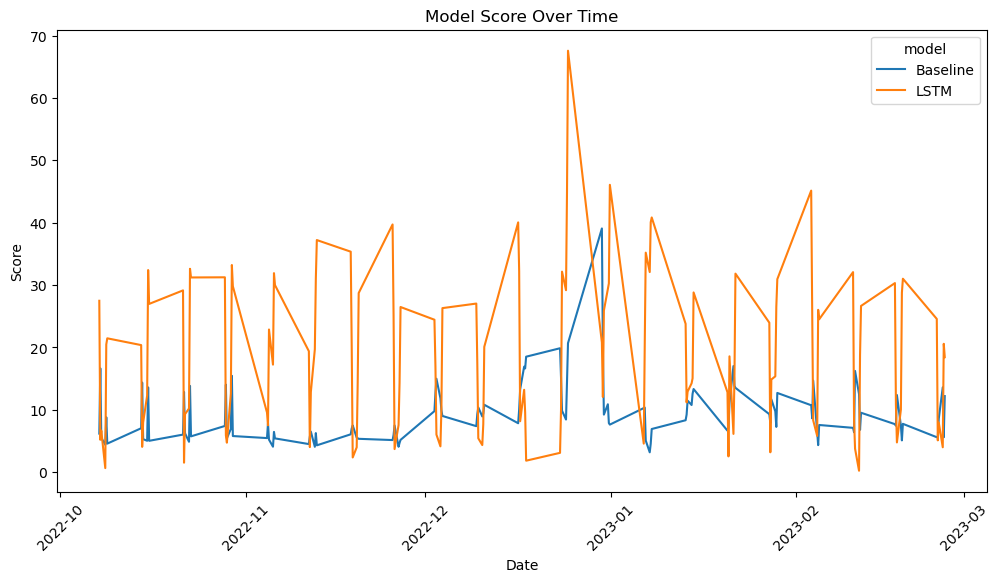

TypeError: 'module' object is not callable

In [19]:
start_date = '2022-10-01'
end_date = '2023-03-01'
best_weight, weight_store_df = find_best_ensemble_weights(energydata, start_date, end_date)

In [16]:
weight_store_df

NameError: name 'weight_store_df' is not defined

<Axes: xlabel='date_time'>

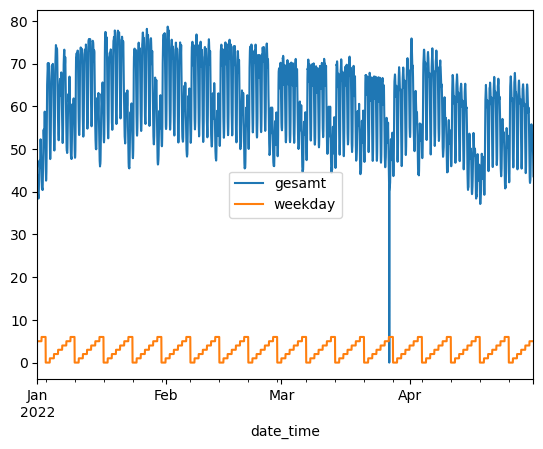

In [13]:
import matplotlib.pyplot as plt
energydata['2022-01-01':'2022-04-30'].plot()